In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
kpop = pd.read_csv('kpop_idol_followers.csv')

In [20]:
kpop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Stage.Name      406 non-null    object 
 1   Group           406 non-null    object 
 2   ig_name         406 non-null    object 
 3   Followers       406 non-null    int64  
 4   Gender.x        406 non-null    object 
 5   Full.Name       406 non-null    object 
 6   Korean.Name     406 non-null    object 
 7   K.Stage.Name    406 non-null    object 
 8   Date.of.Birth   406 non-null    object 
 9   Debut           406 non-null    object 
 10  Company         406 non-null    object 
 11  Country         406 non-null    object 
 12  Second.Country  15 non-null     object 
 13  Height          248 non-null    float64
 14  Weight          175 non-null    float64
 15  Birthplace      288 non-null    object 
 16  Other.Group     79 non-null     object 
 17  Former.Group    35 non-null     obj

In [21]:
kpop.head()

,Stage.Name,Group,ig_name,Followers,Gender.x,Full.Name,Korean.Name,K.Stage.Name,Date.of.Birth,Debut,...,Country,Second.Country,Height,Weight,Birthplace,Other.Group,Former.Group,Gender.y,age,year.career
0,Ace,VAV,ace.vav,335439,Boy,Jang Wooyoung,장우영,에이스,1992-08-28,2015-10-31,...,South Korea,NaN,177.0,63.0,NaN,NaN,NaN,M,30,7
1,Ahra,FAVORITE,ahra.view,12342,Girl,Go Ahra,고아라,아라,2001-02-21,2017-07-05,...,South Korea,NaN,NaN,NaN,Yeosu,NaN,NaN,F,22,6
2,Ahyoung,DAL SHABET,a_young91,10479,Girl,Cho Jayoung,조자영,아영,1991-05-26,2011-01-03,...,South Korea,NaN,NaN,NaN,Seoul,NaN,NaN,F,32,12
3,Alice,HELLO VENUS,hv_alice,11135,Girl,Song Joohee,송주희,앨리스,1990-03-21,2012-05-09,...,South Korea,NaN,166.0,47.0,Wonju,NaN,NaN,F,33,11
4,Amber,F(X),ajol_llama,5519743,Girl,Amber Josephine Liu,엠버 조세핀 리우,엠버,1992-09-18,2009-09-05,...,USA,Taiwan,167.0,NaN,Los Angeles,NaN,NaN,F,30,13


<Axes: xlabel='Followers', ylabel='age'>

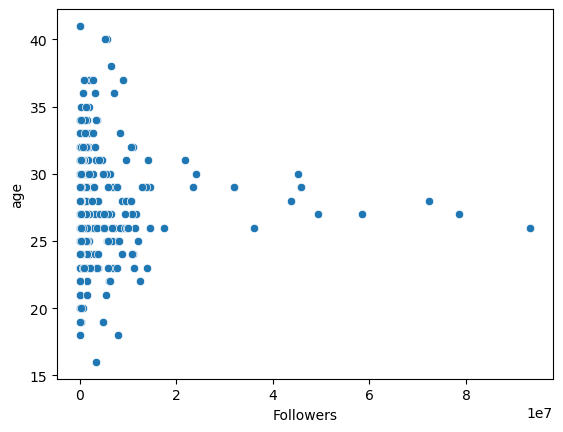

In [22]:
sns.scatterplot(data = kpop,x = 'Followers',y = 'age')

In [29]:
kpop2 = kpop[ ['Followers','age'] ].dropna()
kpop2.head()

,Followers,age
0,335439,30
1,12342,22
2,10479,32
3,11135,33
4,5519743,30


In [30]:
from sklearn.cluster import KMeans

In [35]:
model = KMeans(n_clusters=4,random_state = 0)
model.fit(kpop2)

C:\Users\natty\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\natty\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [36]:
model.cluster_centers_

array([[9.57900090e+06, 2.72537313e+01],
       [8.52328295e+05, 2.76170213e+01],
       [8.14206577e+07, 2.70000000e+01],
       [4.44068214e+07, 2.80000000e+01]])

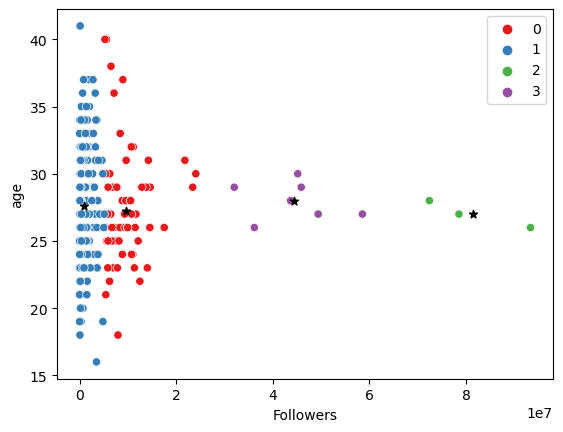

In [37]:
sns.scatterplot(data = kpop,x = 'Followers',y = 'age',hue = model.labels_,palette ='Set1')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color = 'k',marker = '*')